In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [6]:
#Variables
#Input file
train_file = "../data/raw/titanic/train.csv"
#data frame 
df = pd.read_csv(train_file, sep=",", header=0)

In [22]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 1- Show general info about the dataset


In [8]:
# Show general info about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
print("\n Summary Statistics:")
print(df.describe())



 Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [10]:

print("\n🕳️ Missing Values:")
print(df.isnull().sum())


🕳️ Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 2- Data Manipulation (Cleaning & Feature Engineering)

### 2.1- Handling Missing Data

- Predict Age Using a Model (Regression Imputation)

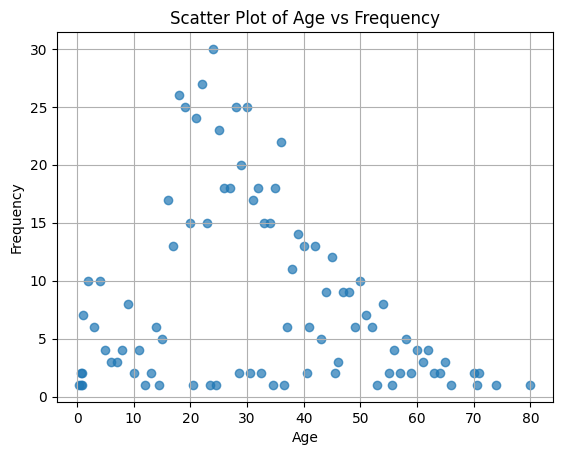

In [18]:
# Drop missing ages and calculate frequency of each unique age
age_counts = df['Age'].dropna().value_counts().sort_index()

# Scatter plot: age (x-axis) vs frequency (y-axis)
plt.scatter(age_counts.index, age_counts.values, alpha=0.7)

plt.title('Scatter Plot of Age vs Frequency')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [24]:
# Check for missing values in the 'Age' column
print("\nMissing values in 'Age' column:")
df['Age'].isna().sum()


Missing values in 'Age' column:


np.int64(177)

In [28]:
df_copy = df.copy()

# Step 1: Encode categorical features
df_copy['Sex'] = df_copy['Sex'].map({'male': 0, 'female': 1})

# Step 2: Prepare train/test sets
train = df_copy[df_copy['Age'].notna()]
test = df_copy[df_copy['Age'].isna()]

# Step 3: Select features (ensure all are numeric now)
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Survived']
age_prediction_model = LinearRegression()

# Step 4: Fit and predict
age_prediction_model.fit(train[features], train['Age'])
predicted_ages = age_prediction_model.predict(test[features])

In [29]:
# Fill in missing values
df.loc[df['Age'].isna(), 'Age'] = predicted_ages

In [30]:
# Check for missing values in the 'Age' column
print("\nMissing values in 'Age' column:")
df['Age'].isna().sum()


Missing values in 'Age' column:


np.int64(0)